### Step 1: Zero-dimensional simulation

In [1]:
import sys
import numpy as np
import cantera as ct
import matplotlib.pylab as plt

gas = ct.Solution('chem.cti')

# simulation parameters
nstep = 2500
dtime = 1.e-6

# composition
gas.TPY = 1200.0, ct.one_atm*1.72, 'C2H4:0.02652, N2:0.74656, O2:0.22692'
r = ct.IdealGasConstPressureReactor(gas)

# data matrix (size NTxNV)
nt = nstep+1
nx = nt
nsc = gas.Y.size
nv = nsc + 1
X = np.zeros((nt,nv)) # data matrix
p = np.zeros((nt))


# simulation object
sim = ct.ReactorNet([r])
time = np.zeros(nt)

# initial condition
for i in range(nsc):
    X[0,i] = gas.Y[i]
X[0,nv-1] = gas.T
p[0] = gas.P

#time = 0.0

for n in range(nstep):
    time[n+1]=time[n]+dtime
    # integrates the solution in time
    sim.advance(time[n+1])
    # append data to X matrix
    for i in range(nsc):
        X[n+1,i] = gas.Y[i]
    X[n+1,nv-1] = gas.T
    p[n+1] = gas.P
    
# save massfractions and temperature
np.save('YT.npy',X)
np.save('p.npy',p)

/tmp/ipykernel_64473/1244881658.py:6: DeprecationWarning: XML_Node::build: 
The CTI and XML input file formats are deprecated and will be removed in
Cantera 3.0. Use 'cti2yaml.py' or 'ctml2yaml.py' to convert CTI or XML input
files to the YAML format. See https://cantera.org/tutorials/legacy2yaml.html
for more information.
  gas = ct.Solution('chem.cti')
/tmp/ipykernel_64473/1244881658.py:6: UserWarning: NasaPoly2::validate: 
For species CH2CHO, discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  26.065097100000003
	Value computed using high-temperature polynomial: 11.747907039000001

  gas = ct.Solution('chem.cti')
/tmp/ipykernel_64473/1244881658.py:6: UserWarning: NasaPoly2::validate: 
For species CH2CHO, discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  13.293446295
	Value computed using high-temperature polynomial: 9.714151448299999

  gas = ct.Solution('chem.cti')
/tmp/ipykernel_64473/1

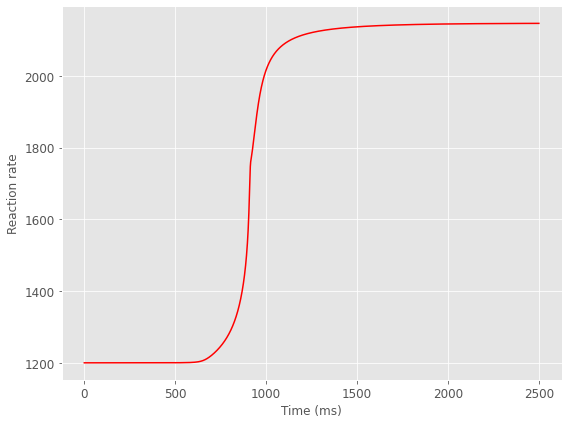

In [2]:
# plot reaction rates
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True 

plt.figure()
plt.plot(X[:,32], '-r')
plt.xlabel('Time (ms)')
plt.ylabel('Reaction rate');

#### Compute reaction rate

In [3]:
nRR = gas.n_reactions        # number of reactions
RR = np.zeros((nt,nRR), dtype=float)   # reaction rates matrix
PR = np.zeros((nt,nsc), dtype=float)
HRR = np.zeros((nt))


# print reactions
# for ir in range(nRR):
#     print(gas.reactions()[ir])

# compute reaction rates at each time step
for it in range(nt):
    gas.TP = X[it,nv-1],p[it]
    gas.Y = X[it,:nsc]
    for ir in range(nRR):
        RR[it,ir] = gas.net_rates_of_progress[ir]
                
    for iv in range(nsc):
        PR[it,iv] = gas.net_production_rates[iv]
        
    HRR[it] =- np.sum(gas.net_production_rates[:] * gas.partial_molar_enthalpies[:], axis=0)



# save massfractions and temperature
np.save('RR.npy',RR)
np.save('PR.npy',PR)
np.save('HRR.npy',HRR)


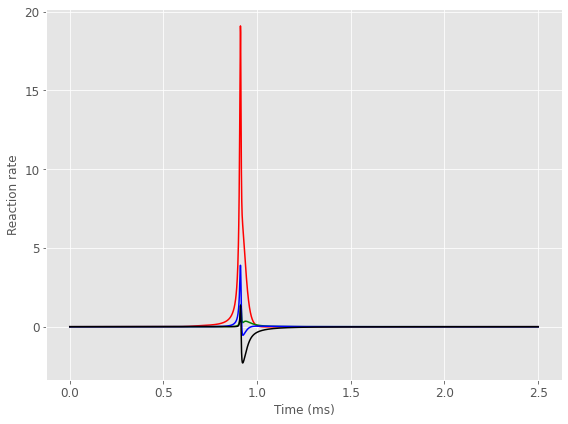

In [4]:
# plot reaction rates
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True 

plt.figure()
plt.plot(time*1e3, RR[:,0], '-r')
plt.plot(time*1e3, RR[:,1], '-g')
plt.plot(time*1e3, RR[:,2], '-b')
plt.plot(time*1e3, RR[:,3], '-k')
plt.xlabel('Time (ms)')
plt.ylabel('Reaction rate');

In [5]:
time

array([0.000e+00, 1.000e-06, 2.000e-06, ..., 2.498e-03, 2.499e-03,
       2.500e-03])